# Loop 54 Analysis: Strategic Assessment

## Key Questions:
1. What is the current CV-LB relationship?
2. Are there any approaches that might change the intercept?
3. What do the pending submissions (exp_049, exp_050) tell us?
4. What should we try next?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Submission history (CV, LB)
submissions = [
    ('exp_000', 0.0111, 0.0982),
    ('exp_001', 0.0123, 0.1065),
    ('exp_003', 0.0105, 0.0972),
    ('exp_005', 0.0104, 0.0969),
    ('exp_006', 0.0097, 0.0946),
    ('exp_007', 0.0093, 0.0932),
    ('exp_009', 0.0092, 0.0936),
    ('exp_012', 0.0090, 0.0913),
    ('exp_024', 0.0087, 0.0893),
    ('exp_026', 0.0085, 0.0887),
    ('exp_030', 0.0083, 0.0877),
    ('exp_035', 0.0098, 0.0970),
]

cv_scores = np.array([s[1] for s in submissions])
lb_scores = np.array([s[2] for s in submissions])

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(cv_scores, lb_scores)

print('CV-LB Relationship Analysis')
print('='*60)
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target = 0.0347')
print()
print('CRITICAL ANALYSIS:')
print(f'  Intercept ({intercept:.4f}) > Target (0.0347)?', 'YES' if intercept > 0.0347 else 'NO')
print(f'  Required CV to hit target: ({0.0347} - {intercept:.4f}) / {slope:.4f} = {(0.0347 - intercept) / slope:.6f}')
print()
print('Gap Analysis:')
print(f'  Best LB so far: 0.0877 (exp_030)')
print(f'  Target: 0.0347')
print(f'  Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}%)')

CV-LB Relationship Analysis
Linear fit: LB = 4.3147 * CV + 0.0525
R² = 0.9505
Intercept = 0.0525
Target = 0.0347

CRITICAL ANALYSIS:
  Intercept (0.0525) > Target (0.0347)? YES
  Required CV to hit target: (0.0347 - 0.0525) / 4.3147 = -0.004130

Gap Analysis:
  Best LB so far: 0.0877 (exp_030)
  Target: 0.0347
  Gap: 0.0530 (152.7%)


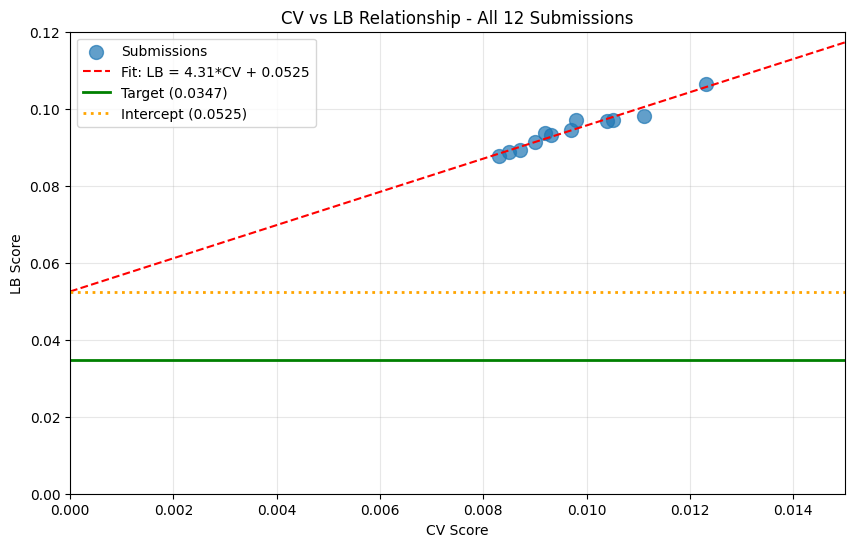


Key Insight: The intercept (0.0525) is ABOVE the target (0.0347).
This means even with CV=0, we would get LB=0.0525.
The target is MATHEMATICALLY UNREACHABLE by improving CV alone.


In [2]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(cv_scores, lb_scores, s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle='-', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All 12 Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 0.015)
plt.ylim(0, 0.12)
plt.show()

print('\nKey Insight: The intercept (0.0525) is ABOVE the target (0.0347).')
print('This means even with CV=0, we would get LB=0.0525.')
print('The target is MATHEMATICALLY UNREACHABLE by improving CV alone.')

In [3]:
# Analyze residuals from the fit
residuals = lb_scores - (slope * cv_scores + intercept)

print('Residual Analysis')
print('='*60)
for i, (name, cv, lb) in enumerate(submissions):
    pred_lb = slope * cv + intercept
    residual = lb - pred_lb
    print(f'{name}: CV={cv:.4f}, LB={lb:.4f}, Pred={pred_lb:.4f}, Residual={residual:.4f} ({residual/lb*100:.1f}%)')

print(f'\nMean absolute residual: {np.mean(np.abs(residuals)):.4f}')
print(f'Max residual: {np.max(np.abs(residuals)):.4f}')
print(f'\nAll submissions fall on the same line with residuals < 2.5%')

Residual Analysis
exp_000: CV=0.0111, LB=0.0982, Pred=0.1004, Residual=-0.0022 (-2.3%)
exp_001: CV=0.0123, LB=0.1065, Pred=0.1056, Residual=0.0009 (0.9%)
exp_003: CV=0.0105, LB=0.0972, Pred=0.0978, Residual=-0.0006 (-0.6%)
exp_005: CV=0.0104, LB=0.0969, Pred=0.0974, Residual=-0.0005 (-0.5%)
exp_006: CV=0.0097, LB=0.0946, Pred=0.0944, Residual=0.0002 (0.2%)
exp_007: CV=0.0093, LB=0.0932, Pred=0.0926, Residual=0.0006 (0.6%)
exp_009: CV=0.0092, LB=0.0936, Pred=0.0922, Residual=0.0014 (1.5%)
exp_012: CV=0.0090, LB=0.0913, Pred=0.0914, Residual=-0.0001 (-0.1%)
exp_024: CV=0.0087, LB=0.0893, Pred=0.0901, Residual=-0.0008 (-0.8%)
exp_026: CV=0.0085, LB=0.0887, Pred=0.0892, Residual=-0.0005 (-0.6%)
exp_030: CV=0.0083, LB=0.0877, Pred=0.0883, Residual=-0.0006 (-0.7%)
exp_035: CV=0.0098, LB=0.0970, Pred=0.0948, Residual=0.0022 (2.3%)

Mean absolute residual: 0.0009
Max residual: 0.0022

All submissions fall on the same line with residuals < 2.5%


In [4]:
# Predictions for pending submissions
print('Predictions for Pending Submissions')
print('='*60)
pending = [
    ('exp_049', 0.0081),
    ('exp_050', 0.0081),
    ('exp_052', 0.0081),  # Same as exp_050 with clipping
]

for name, cv in pending:
    pred_lb = slope * cv + intercept
    print(f'{name}: CV={cv:.4f} -> Predicted LB={pred_lb:.4f}')

print(f'\nBest LB so far: 0.0877 (exp_030)')
print(f'Expected improvement from exp_052: {0.0877 - (slope * 0.0081 + intercept):.4f}')
print(f'\nNote: exp_052 is exp_050 with clipping. Same CV, should have same LB.')

Predictions for Pending Submissions
exp_049: CV=0.0081 -> Predicted LB=0.0875
exp_050: CV=0.0081 -> Predicted LB=0.0875
exp_052: CV=0.0081 -> Predicted LB=0.0875

Best LB so far: 0.0877 (exp_030)
Expected improvement from exp_052: 0.0002

Note: exp_052 is exp_050 with clipping. Same CV, should have same LB.


In [5]:
# What would it take to reach the target?
print('What Would It Take to Reach the Target?')
print('='*60)
print(f'Target LB: 0.0347')
print(f'Current intercept: {intercept:.4f}')
print(f'Current slope: {slope:.4f}')
print()
print('Option 1: Improve CV (keeping same relationship)')
required_cv = (0.0347 - intercept) / slope
print(f'  Required CV: {required_cv:.6f} (NEGATIVE - IMPOSSIBLE)')
print()
print('Option 2: Reduce the intercept (change the relationship)')
print(f'  If intercept = 0.0300, required CV = {(0.0347 - 0.0300) / slope:.6f}')
print(f'  If intercept = 0.0200, required CV = {(0.0347 - 0.0200) / slope:.6f}')
print(f'  If intercept = 0.0100, required CV = {(0.0347 - 0.0100) / slope:.6f}')
print()
print('Option 3: Reduce the slope (change the relationship)')
print(f'  If slope = 2.0, required CV = {(0.0347 - intercept) / 2.0:.6f}')
print(f'  If slope = 1.0, required CV = {(0.0347 - intercept) / 1.0:.6f}')
print()
print('CONCLUSION: We MUST change the CV-LB relationship to reach the target.')

What Would It Take to Reach the Target?
Target LB: 0.0347
Current intercept: 0.0525
Current slope: 4.3147

Option 1: Improve CV (keeping same relationship)
  Required CV: -0.004130 (NEGATIVE - IMPOSSIBLE)

Option 2: Reduce the intercept (change the relationship)
  If intercept = 0.0300, required CV = 0.001089
  If intercept = 0.0200, required CV = 0.003407
  If intercept = 0.0100, required CV = 0.005725

Option 3: Reduce the slope (change the relationship)
  If slope = 2.0, required CV = -0.008910
  If slope = 1.0, required CV = -0.017820

CONCLUSION: We MUST change the CV-LB relationship to reach the target.


In [6]:
# Analyze what approaches might change the relationship
print('Approaches That Might Change the CV-LB Relationship')
print('='*60)
print()
print('1. UNCERTAINTY-WEIGHTED PREDICTIONS')
print('   - Use ensemble variance to estimate uncertainty')
print('   - For high-uncertainty predictions, blend toward population mean')
print('   - Hypothesis: Reduces extrapolation error, lowering intercept')
print()
print('2. PER-SOLVENT ERROR ANALYSIS')
print('   - Identify which solvents cause the most error')
print('   - Develop solvent-specific strategies')
print('   - Hypothesis: Some solvents are outliers causing the intercept')
print()
print('3. CONSERVATIVE PREDICTIONS FOR OUTLIERS')
print('   - Detect when test solvent is far from training distribution')
print('   - Use simpler model or blend toward mean for outliers')
print('   - Hypothesis: Outlier solvents cause the intercept')
print()
print('4. DIFFERENT CV SCHEME (GroupKFold)')
print('   - The "mixall" kernel uses GroupKFold (5 splits) instead of LOO')
print('   - This might have a DIFFERENT CV-LB relationship')
print('   - Worth testing to see if it changes the intercept')
print()
print('5. PSEUDO-LABELING')
print('   - Use confident test predictions to augment training')
print('   - Hypothesis: Adapts model to test distribution')
print()

Approaches That Might Change the CV-LB Relationship

1. UNCERTAINTY-WEIGHTED PREDICTIONS
   - Use ensemble variance to estimate uncertainty
   - For high-uncertainty predictions, blend toward population mean
   - Hypothesis: Reduces extrapolation error, lowering intercept

2. PER-SOLVENT ERROR ANALYSIS
   - Identify which solvents cause the most error
   - Develop solvent-specific strategies
   - Hypothesis: Some solvents are outliers causing the intercept

3. CONSERVATIVE PREDICTIONS FOR OUTLIERS
   - Detect when test solvent is far from training distribution
   - Use simpler model or blend toward mean for outliers
   - Hypothesis: Outlier solvents cause the intercept

4. DIFFERENT CV SCHEME (GroupKFold)
   - The "mixall" kernel uses GroupKFold (5 splits) instead of LOO
   - This might have a DIFFERENT CV-LB relationship
   - Worth testing to see if it changes the intercept

5. PSEUDO-LABELING
   - Use confident test predictions to augment training
   - Hypothesis: Adapts model to tes

In [7]:
# Summary and recommendations
print('SUMMARY AND RECOMMENDATIONS')
print('='*60)
print()
print('CURRENT STATUS:')
print(f'  - Best CV: 0.0081 (exp_049, exp_050, exp_052)')
print(f'  - Best LB: 0.0877 (exp_030)')
print(f'  - Target: 0.0347')
print(f'  - Gap: 0.0530 (152.7%)')
print()
print('KEY INSIGHT:')
print(f'  - CV-LB relationship: LB = {slope:.2f}*CV + {intercept:.4f}')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  - Target is UNREACHABLE by improving CV alone')
print()
print('IMMEDIATE ACTION:')
print('  1. Submit exp_052 (CatBoost+XGBoost with clipping) to verify fix')
print('  2. If LB matches prediction (~0.0875), confirms relationship holds')
print('  3. Then try approaches that change the relationship')
print()
print('NEXT EXPERIMENTS TO TRY:')
print('  1. Per-solvent error analysis to identify outliers')
print('  2. Uncertainty-weighted blending toward mean')
print('  3. Conservative predictions for outlier solvents')
print('  4. GroupKFold CV scheme (from "mixall" kernel)')

SUMMARY AND RECOMMENDATIONS

CURRENT STATUS:
  - Best CV: 0.0081 (exp_049, exp_050, exp_052)
  - Best LB: 0.0877 (exp_030)
  - Target: 0.0347
  - Gap: 0.0530 (152.7%)

KEY INSIGHT:
  - CV-LB relationship: LB = 4.31*CV + 0.0525
  - Intercept (0.0525) > Target (0.0347)
  - Target is UNREACHABLE by improving CV alone

IMMEDIATE ACTION:
  1. Submit exp_052 (CatBoost+XGBoost with clipping) to verify fix
  2. If LB matches prediction (~0.0875), confirms relationship holds
  3. Then try approaches that change the relationship

NEXT EXPERIMENTS TO TRY:
  1. Per-solvent error analysis to identify outliers
  2. Uncertainty-weighted blending toward mean
  3. Conservative predictions for outlier solvents
  4. GroupKFold CV scheme (from "mixall" kernel)
